In [1]:
import pandas as pd
import numpy as np
import statsmodels
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("airbnb-listings.csv",sep=";")

In [6]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [7]:
len(df.columns)

89

In [8]:
def dist_box(data, colums, fsize=12):

    """
    Box-plot affichant les index des valeurs outliers ainsi que la distribution
    Paramètres 
    -----------
    data : dataframe contenant les données
    colums : chaine de caractère du nom de la colonne 
    vertical : orientation des box-plot (vertical par défaut)
    fsize : taille de la police des index des valeurs outliers
    """
    fig = plt.figure(figsize=(8,7))
    gs = fig.add_gridspec(4, 4)
    f_ax1 = fig.add_subplot(gs[0, :])
    f_ax2 = fig.add_subplot(gs[1:,:],sharex=f_ax1)

    mean=data[colums].mean()

    median=data[colums].median()
    print(colums)
    print("Moyenne : ",round(df[colums].mean(),2))
    print("median : ",round(df[colums].median(),2))
    print("Min : ",df[colums].min())
    print("Max : ",df[colums].max())
    print("Count : ", df[colums].size, ", dont NA : ", data[colums].isna().sum())

    B = f_ax1.boxplot(data[colums], vert=False, patch_artist=True, 
                    flierprops={'marker':"D",'markersize':'3','markerfacecolor':'b'}, 
                      medianprops={'color':'grey', 'lw':'2'}, 
                    boxprops={'color':'grey','lw':'2'}, whiskerprops={'color':'grey','lw':'2'},
                   capprops={'color':'grey','lw':'2'})

    fliers = B["fliers"][0].get_xdata()
    for f in fliers :
        ypos = B["medians"][0].get_ydata()[0]
        name = list(data[colums].index[data[colums] == f])[0]
        f_ax1.text(f, 0.2 + ypos, name, fontsize=fsize, rotation='vertical')

    f_ax1.axvline(mean, color='r', linestyle='--')
    f_ax1.axvline(median, color='g', linestyle='-')
    f_ax1.axes.get_xaxis().set_visible(False)

    f_ax2.axvline(mean, color='r', linestyle='--')
    f_ax2.axvline(median, color='g', linestyle='-')
    f_ax2.legend({'Mean':mean,'Median':median})
    f_ax2 = sns.distplot(data[colums])
    plt.show()

def stat_univ(data, var, corr=True):

    dist_box(data,var)
    plt.figure(figsize=(23,1))
    
    if(corr):
        correlation =  data.corr(method='pearson')[var].round(2).to_frame().sort_values(by=var).T
        sns.heatmap(correlation,cmap="RdYlGn_r",fmt="g",annot=True)

#stat_univ(df_1, 'inscrits_1')



In [9]:
for col in df.columns:
    try:
        percent_missing = df[col].isnull().sum() * 100 / len(df[col])
        if percent_missing > 10:
            print(f"{col:<30}{str(round(percent_missing,3)):<9} % de donnée manquantes")
    except Exception as e:
        print(e)

Space                         30.338    % de donnée manquantes
Neighborhood Overview         40.071    % de donnée manquantes
Notes                         67.934    % de donnée manquantes
Transit                       35.78     % de donnée manquantes
Access                        48.95     % de donnée manquantes
Interaction                   51.94     % de donnée manquantes
House Rules                   46.314    % de donnée manquantes
Thumbnail Url                 34.274    % de donnée manquantes
Medium Url                    34.274    % de donnée manquantes
XL Picture Url                34.274    % de donnée manquantes
Host About                    45.028    % de donnée manquantes
Host Response Time            33.196    % de donnée manquantes
Host Response Rate            33.196    % de donnée manquantes
Host Acceptance Rate          100.0     % de donnée manquantes
Host Neighbourhood            11.885    % de donnée manquantes
Neighbourhood                 13.8      % de donnée man

In [10]:
df.shape

(54513, 89)

In [11]:
df_num = df._get_numeric_data()

In [12]:
df_num.head()

,ID,Scrape ID,Host ID,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,Latitude,Longitude,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,5380461,20170404145355,27890912,100.0,NaN,1.0,1.0,NaN,48.844560,2.263367,...,3,80.0,7.0,8.0,9.0,9.0,10.0,7.0,1,0.16
1,12994171,20170404145355,71610547,100.0,NaN,1.0,1.0,NaN,48.858071,2.280221,...,5,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.56
2,16270986,20170404145355,101189935,100.0,NaN,1.0,1.0,NaN,48.850203,2.270832,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00
3,16267918,20170404145355,51067644,NaN,NaN,1.0,1.0,NaN,48.842013,2.268854,...,5,93.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.38
4,8531724,20170404145355,11719631,100.0,NaN,1.0,1.0,NaN,48.841048,2.259448,...,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.35


In [13]:
df_num.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,Latitude,Longitude,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,5.451300e+04,5.451300e+04,5.451300e+04,36417.000000,0.0,54502.000000,54502.000000,0.0,54513.000000,54513.000000,...,54513.000000,40263.000000,40158.000000,40183.000000,40135.000000,40178.000000,40145.000000,40138.000000,54513.000000,41048.000000
mean,9.022502e+06,2.017040e+13,2.897076e+07,91.617514,NaN,5.011541,5.011541,NaN,48.863915,2.344876,...,15.187295,91.850806,9.486578,9.175348,9.658777,9.691747,9.512193,9.255693,3.632491,1.164417
std,5.353384e+06,0.000000e+00,2.901300e+07,20.393663,NaN,22.271642,22.271642,NaN,0.018332,0.033205,...,30.050845,8.309190,0.820982,1.079196,0.708742,0.699868,0.764039,0.877714,10.634824,1.374773
min,2.525000e+03,2.017040e+13,2.626000e+03,0.000000,NaN,0.000000,0.000000,NaN,48.814903,2.227926,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,4.450895e+06,2.017040e+13,7.019970e+06,95.000000,NaN,1.000000,1.000000,NaN,48.850601,2.323833,...,1.000000,89.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,1.000000,0.260000
50%,8.709196e+06,2.017040e+13,1.830777e+07,100.000000,NaN,1.000000,1.000000,NaN,48.864712,2.347934,...,4.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.660000
75%,1.375697e+07,2.017040e+13,4.014774e+07,100.000000,NaN,2.000000,2.000000,NaN,48.879146,2.369774,...,16.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.520000
max,1.805586e+07,2.017040e+13,1.242594e+08,100.000000,NaN,661.000000,661.000000,NaN,48.901056,2.458650,...,488.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,102.000000,18.000000


ID
Moyenne :  9022502.1
median :  8709196.0
Min :  2525
Max :  18055861
Count :  54513 , dont NA :  0


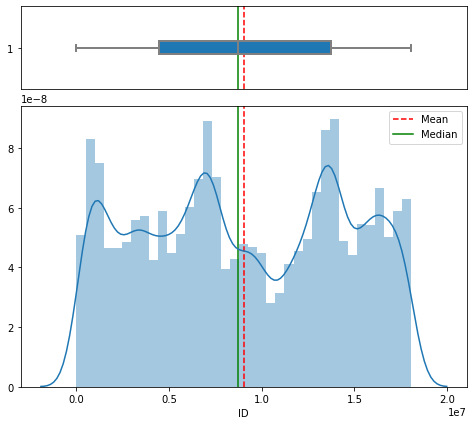

In [14]:
dist_box(data=df_num, colums=df_num.columns[0] )

ID
Moyenne :  9022502.1
median :  8709196.0
Min :  2525
Max :  18055861
Count :  54513 , dont NA :  0


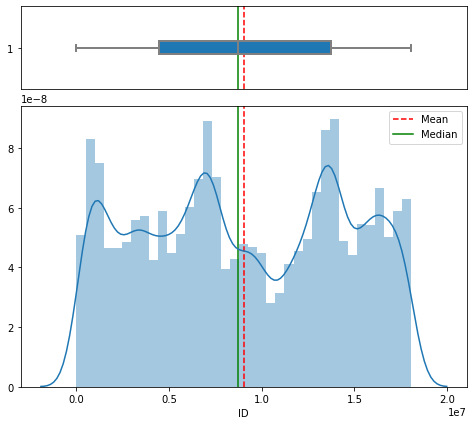

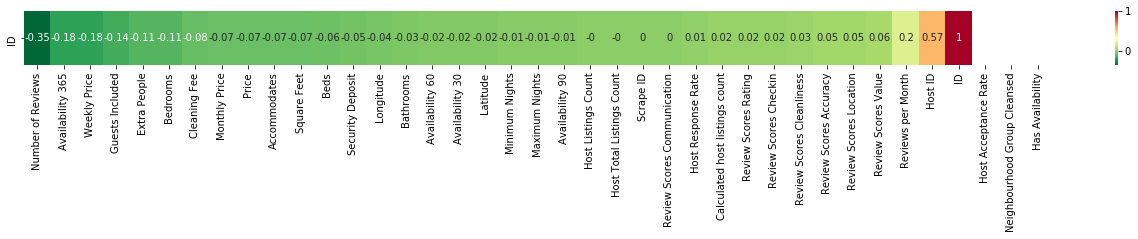

In [15]:
stat_univ(df_num, df_num.columns[0])

In [34]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [16]:
df_new = df[["ID","Name", "Summary", "Space", "Neighborhood Overview", "Notes", "Transit", "Interaction", "Host Since", "Host Verifications", "Neighbourhood Cleansed",
"Property Type", "Room Type", "Accommodates", "Bathrooms", "Bedrooms", "Beds", "Bed Type", "Amenities", "Price", "Security Deposit", "Cleaning Fee",
"Guests Included", "Extra People", "Minimum Nights", "Maximum Nights", "Calendar Updated", "Availability 30","Availability 60", "Availability 90", "Availability 365", "Review Scores Accuracy", "Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", "Review Scores Value", "Cancellation Policy", "Reviews per Month", "Geolocation", "Features"
]]

In [125]:
df_new.to_csv("new_data.csv", index="ID")

In [17]:
df_new.describe()

,ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Availability 60,Availability 90,Availability 365,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
count,5.451300e+04,54513.000000,54329.000000,54379.000000,54438.000000,54459.000000,30107.000000,34594.000000,54513.000000,54513.000000,...,54513.000000,54513.000000,54513.000000,40158.000000,40183.000000,40135.000000,40178.000000,40145.000000,40138.000000,41048.000000
mean,9.022502e+06,3.034506,1.093219,1.054267,1.679084,94.787418,331.906766,35.553362,1.389118,5.534240,...,18.526773,30.237485,146.355053,9.486578,9.175348,9.658777,9.691747,9.512193,9.255693,1.164417
std,5.353384e+06,1.477910,0.379980,0.795793,1.031990,73.357710,181.763396,27.608773,0.880749,12.886121,...,22.009222,33.632517,141.272204,0.820982,1.079196,0.708742,0.699868,0.764039,0.877714,1.374773
min,2.525000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,69.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,4.450895e+06,2.000000,1.000000,1.000000,1.000000,55.000000,200.000000,20.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,0.260000
50%,8.709196e+06,2.000000,1.000000,1.000000,1.000000,75.000000,300.000000,30.000000,1.000000,0.000000,...,8.000000,15.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.660000
75%,1.375697e+07,4.000000,1.000000,1.000000,2.000000,107.000000,500.000000,49.000000,1.000000,10.000000,...,35.000000,60.000000,293.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.520000
max,1.805586e+07,16.000000,8.000000,10.000000,16.000000,999.000000,999.000000,750.000000,16.000000,753.000000,...,60.000000,90.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


In [18]:
df_new["Features"].value_counts()


Host Has Profile Pic,Host Identity Verified,Is Location Exact                                              18139
Host Has Profile Pic,Is Location Exact                                                                     15124
Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable                              4825
Host Has Profile Pic,Is Location Exact,Instant Bookable                                                     4342
Host Has Profile Pic,Host Identity Verified                                                                 3184
                                                                                                           ...  
Host Identity Verified                                                                                         1
Host Is Superhost,Host Has Profile Pic,Require Guest Profile Picture                                           1
Is Location Exact,Require Guest Profile Picture,Require Guest Phone Verification                

In [19]:
df[["Guests Included", "Accommodates", "Price"]]

,Guests Included,Accommodates,Price
0,1,2,50.0
1,4,5,250.0
2,1,7,165.0
3,1,2,35.0
4,2,4,90.0
...,...,...,...
54508,1,2,40.0
54509,1,1,30.0
54510,1,3,47.0
54511,2,4,59.0


In [119]:
df_new.columns

Index(['Name', 'Summary', 'Space', 'Neighborhood Overview', 'Notes', 'Transit',
       'Interaction', 'Host Since', 'Host Verifications',
       'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Geolocation', 'Features'],
      dtype='object')

In [20]:
df_num = df_new._get_numeric_data()

In [21]:
df_num.columns

Index(['ID', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Reviews per Month'],
      dtype='object')

Accommodates
Moyenne :  3.03
median :  2.0
Min :  1
Max :  16
Count :  54513 , dont NA :  0


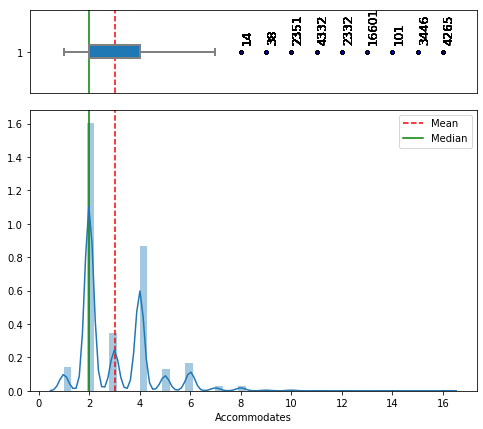

In [22]:
dist_box(data=df_num, colums="Accommodates" )

Price
Moyenne :  94.79
median :  75.0
Min :  0.0
Max :  999.0
Count :  54513 , dont NA :  54


C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


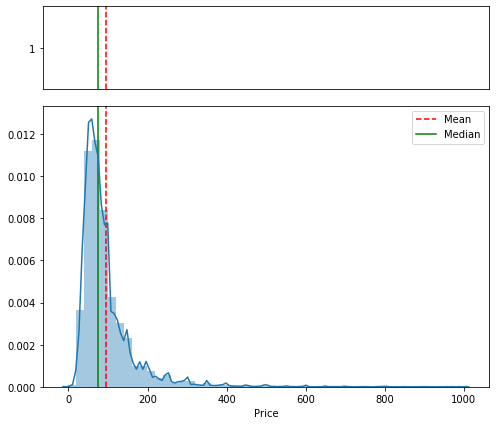

In [26]:
dist_box(data=df_num, colums="Price" )

Security Deposit
Moyenne :  331.91
median :  300.0
Min :  69.0
Max :  999.0
Count :  54513 , dont NA :  24406


C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Afiz\Anaconda3\envs\mow\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


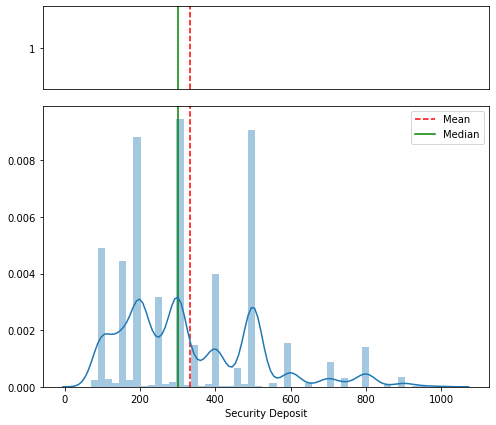

In [27]:
dist_box(data=df_num, colums="Security Deposit")